In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [76]:
df=pd.read_excel('.xlsx',sheet_name='CustomerDemographic')
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
df

In [77]:
df=df.drop('default',axis=1)
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [78]:
print(df.isnull().sum())

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64


In [80]:
df=df.dropna(axis=0,subset=['DOB','job_title','job_industry_category','job_industry_category','tenure'],inplace=None)
print(df.isnull().sum())

customer_id                             0
first_name                              0
last_name                              85
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                     0
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
dtype: int64


In [81]:
df['gender'].value_counts()

Female    1481
Male      1381
F            1
Femal        1
U            1
Name: gender, dtype: int64

In [82]:
df=df.replace(['Femal','F'],'Female')
df['gender'].value_counts()

Female    1483
Male      1381
U            1
Name: gender, dtype: int64

In [92]:
df=df.drop(df[df['gender']=='U'].index)
df['gender'].value_counts()

Female    1482
Male      1380
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x207a0b5b108>,
 [Text(-1.0977962737490021, 0.06959411859349932, 'Male'),
  Text(1.0977962737490021, -0.06959411859349994, 'Female')],
 [Text(-0.5987979674994557, 0.03796042832372689, '48.0%'),
  Text(0.5987979674994557, -0.03796042832372724, '52.0%')])

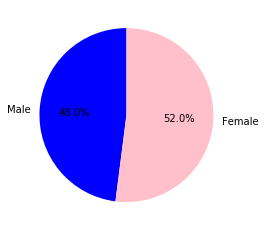

In [93]:
gender=['Male','Female']
count=[1262,1368]
colors=['blue','pink']
plt.pie(count,labels=gender,colors=colors,startangle=90,autopct='%.1f%%')

In [94]:
df['job_industry_category'].value_counts()

Manufacturing         695
Financial Services    682
Health                542
Retail                304
Property              231
IT                    126
Entertainment         122
Argiculture            99
Telecommunications     61
Name: job_industry_category, dtype: int64

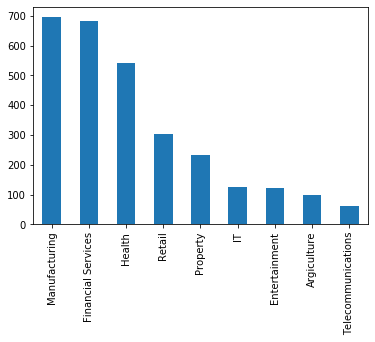

In [95]:
df['job_industry_category'].value_counts()[:].plot(kind='bar')

NameError: name 'patches' is not defined

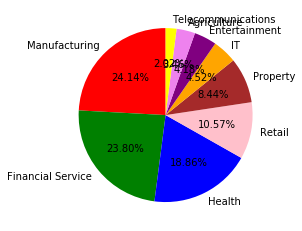

In [96]:
industry=['Manufacturing','Financial Service','Health','Retail','Property','IT','Entertainment','Agriculture','Telecommunications']
no=[635,626,496,278,222,119,110,91,53]
color=['red','green','blue','pink','brown','orange','purple','violet','yellow']
plt.pie(no,labels=industry,colors=color,startangle=90,autopct="%.2f%%")
plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

In [97]:
df['wealth_segment'].value_counts()

Mass Customer        1426
High Net Worth        734
Affluent Customer     702
Name: wealth_segment, dtype: int64

In [98]:
df['deceased_indicator'].value_counts()

N    2862
Name: deceased_indicator, dtype: int64

In [89]:
df.drop(df[df['deceased_indicator']=='Y'].index,inplace=True)
df['deceased_indicator'].value_counts()

N    2863
Name: deceased_indicator, dtype: int64

In [99]:
df.to_excel('.xlsx',sheet_name='Customer_Demographics')